In [1]:
import pandas as pd
import requests
import os
from utils import *
import glob 

In [2]:
'''
Creation of DataFrame and using only the Columns of Title,Rating,Genre and PosterLink
'''

data=pd.read_csv("/home/sreegs/Documents/Movie-Genre-Prediction-/archive/MovieGenre.csv",encoding='latin1',usecols=['imdbId','Title','IMDB Score','Genre','Poster'])

In [3]:
data.head()

,imdbId,Title,IMDB Score,Genre,Poster
0,114709,Toy Story (1995),8.3,Animation|Adventure|Comedy,https://images-na.ssl-images-amazon.com/images...
1,113497,Jumanji (1995),6.9,Action|Adventure|Family,https://images-na.ssl-images-amazon.com/images...
2,113228,Grumpier Old Men (1995),6.6,Comedy|Romance,https://images-na.ssl-images-amazon.com/images...
3,114885,Waiting to Exhale (1995),5.7,Comedy|Drama|Romance,https://images-na.ssl-images-amazon.com/images...
4,113041,Father of the Bride Part II (1995),5.9,Comedy|Family|Romance,https://images-na.ssl-images-amazon.com/images...


In [4]:
data.dtypes
print("Number of Rows " + str(data.shape[0]))

Number of Rows 40108


In [5]:
print(data.isnull().sum())
print("\n Number of Duplicated Entries : "+str(data.duplicated(subset='Title').sum()))

imdbId          0
Title           0
IMDB Score     48
Genre         145
Poster        725
dtype: int64

 Number of Duplicated Entries : 638


In [6]:
#Handling Missing Values,Since Each Data is Independent ,We can Drop the Rows with Missing values
data.dropna(axis=0,inplace=True)
data.drop_duplicates(subset='Title',inplace=True)
print(data.shape)

(38611, 5)


<h1>Data Analysis</h1>

In [7]:
import matplotlib.pyplot as plt 
print("Number of Movies : "+str(len(list(data.Title))))
genrelist=[]

for index,rows in data.iterrows():
    genre=str(rows.Genre)
    genre=genre.split('|')
    genrelist.extend(genre)
print("Number of Unique Genre are :"+str(len(list(set(genrelist)))))
print("Unique Genre are "+str(list(set(genrelist))))

Number of Movies : 38611
Number of Unique Genre are :28
Unique Genre are ['Documentary', 'Mystery', 'Sci-Fi', 'Reality-TV', 'Thriller', 'Talk-Show', 'Sport', 'Animation', 'Biography', 'Family', 'Romance', 'Adventure', 'Short', 'Action', 'Crime', 'Musical', 'War', 'Fantasy', 'History', 'Western', 'Film-Noir', 'Drama', 'News', 'Music', 'Horror', 'Adult', 'Game-Show', 'Comedy']


Documentary 3495
Mystery 2348
Sci-Fi 1967
Reality-TV 2
Thriller 4719
Talk-Show 6
Sport 682
Animation 1683
Biography 1928
Family 2060
Romance 6060
Adventure 3735
Short 915
Action 5224
Crime 5150
Musical 826
War 1139
Fantasy 1971
History 1372
Western 832
Film-Noir 395
Drama 19496
News 78
Music 1243
Horror 3923
Adult 9
Game-Show 1
Comedy 12361


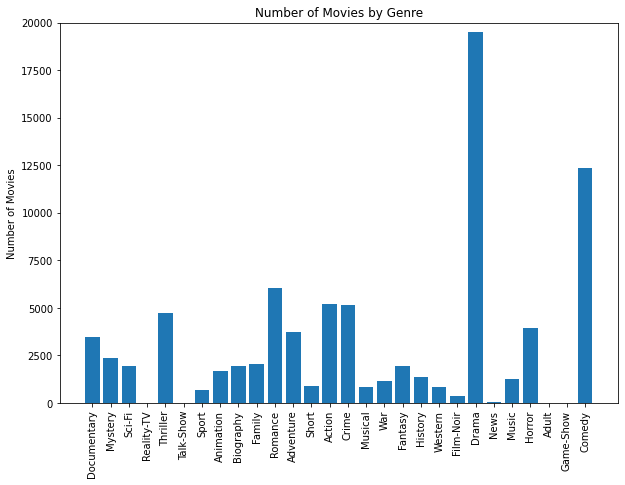

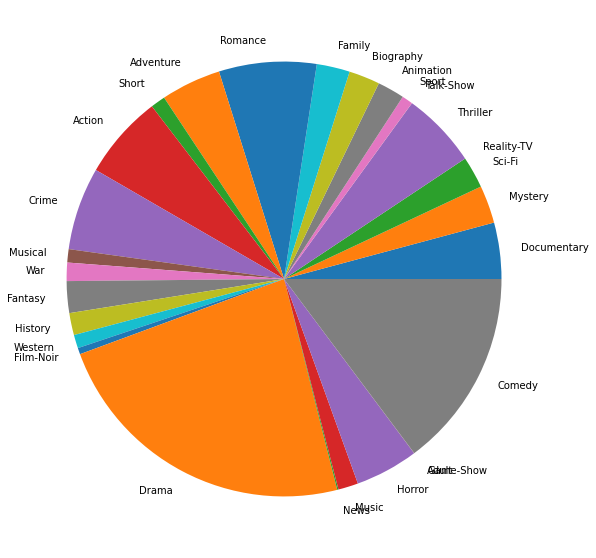

In [19]:
import numpy as np
unique_genres=list(set(genrelist))
countlist = []
k=0
for genre in unique_genres:
    ct = genrelist.count(genre)
    countlist.append(ct)
    print(genre + " " + str(ct))

#Create Bar Graph of values
y_pos = np.arange(len(unique_genres))
fig1=plt.figure(figsize=(10,7))
plt.bar(y_pos,countlist,align='center',alpha=1,linewidth=1)
plt.xticks(y_pos,unique_genres,rotation='vertical')
plt.ylim(0,20000)
plt.ylabel("Number of Movies")
plt.title("Number of Movies by Genre")
plt.show()

fig=plt.figure(figsize=(15,10))
plt.pie(countlist,labels=unique_genres)
plt.show()
